In [48]:
#importing Modules
import pandas as pd
import numpy as np


In [49]:
#upload Dataset from Local Directory to google Colab
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic (1).csv


In [50]:
#Load the Dataset
dataset=pd.read_csv('titanic.csv')

In [51]:
#Summerize the Data
print(dataset.shape)
dataset.head()

(418, 5)


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [52]:
# Mapping the Sex column 
income_set=set(dataset['Sex'])
dataset['Sex']=dataset['Sex'].map({'female':0,'male':1}).astype(int)  # replacing the string data into integer
print(dataset.head)

<bound method NDFrame.head of      Survived  Pclass  Sex   Age      Fare
0           0       3    1  34.5    7.8292
1           1       3    0  47.0    7.0000
2           0       2    1  62.0    9.6875
3           0       3    1  27.0    8.6625
4           1       3    0  22.0   12.2875
..        ...     ...  ...   ...       ...
413         0       3    1   NaN    8.0500
414         1       1    0  39.0  108.9000
415         0       3    1  38.5    7.2500
416         0       3    1   NaN    8.0500
417         0       3    1   NaN   22.3583

[418 rows x 5 columns]>


In [53]:
# Segregatting the Data
x=dataset.drop('Survived',axis='columns')
y=dataset.Survived

In [54]:
# Find the Null Columns
x.columns[x.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [55]:
# Null Elemente fill by mean function
x.Age=x.Age.fillna(x.Age.mean())
x.Fare=x.Fare.fillna(x.Fare.mean())


In [56]:
x.columns[x.isna().any()]

Index([], dtype='object')

In [57]:
# Segregatting the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [58]:
# Creating the Model
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [59]:
# Predicting the Output
pclass=int(input("enter a persons class: "))
gender=int(input("enter male for 1 and female for 0 : "))
age=int(input("enter your age:"))
fare=float(input("enter person fare: "))
person=[[pclass,gender,age,fare]]
result=model.predict(person)
print(result)
if result==1:
  print("person will be survived")
else:
  print("person will not be survived")


enter a persons class: 45
enter male for 1 and female for 0 : 1
enter your age:23
enter person fare: 2334
[0]
person will not be survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [60]:
y_pred=model.predict(x_test)


In [61]:
#MOdel Accuracy
from sklearn.metrics import accuracy_score
print("accuracy of model {}%".format(accuracy_score(y_pred,y_test)*100))

accuracy of model 100.0%


In [62]:
# Visualizing the Data
import seaborn as sns
from matplotlib.legend_handler import HandlerBase
import matplotlib.pyplot as plt

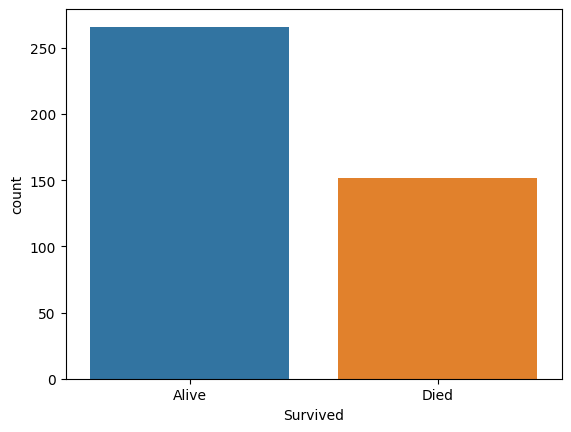

In [63]:
dataset.replace({'Survived':{0:'Alive',1:'Died'}},inplace=True)
ax=sns.countplot(x = 'Survived', data = dataset) 
plt.show() 